# Logistic Regression

### data: 성별 소득 data 에 따라 특정 구매자의 구매할지 여부를 예측

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import accuracy_score, precision_score,\
                            recall_score, roc_curve, roc_auc_score
import seaborn as sns

dataset = pd.read_csv('datasets/Social_Network_Ads.csv')

In [2]:
dataset.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [3]:
dataset['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

### Age, EstimatedSalary 를 변수로 선택

In [4]:
X = dataset.iloc[:, [2,3]].values.astype("float32")
y = dataset.iloc[:, 4].values.astype("float32")

dataset 을 Training 과 Test set 으로 분리

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling

### train data 로 fit 하고, test data 는 train data 의 분포에 맞추어 transform

In [6]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [7]:
print(X_train.shape)

(320, 2)


### Training set 에 대해 Logistic Regression model 을 fitting

In [8]:
lr_classifier = LogisticRegression(solver='lbfgs', random_state=0)
lr_classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### predict

- predict() - 예측된 class 반환 using X_test
- predict_proba() - class 당 probability 반환 using X_test

In [9]:
y_pred = lr_classifier.predict(X_test)

print("Test set의 실제 true 갯수 = ", sum(y_test))
print("모델이 예측한 true 갯수 = ", sum(y_pred))
print("accuracy = {:.2f}".format(accuracy_score(y_test, y_pred)))
print("precision = {:.2f}".format(precision_score(y_test, y_pred)))
print("recall = {:.2f}".format(recall_score(y_test, y_pred)))

Test set의 실제 true 갯수 =  22.0
모델이 예측한 true 갯수 =  18.0
accuracy = 0.93
precision = 0.94
recall = 0.77


In [10]:
y_pred_proba = lr_classifier.predict_proba(X_test)

print(y_pred_proba[:5])
print()
print(y_pred_proba[:,1][:5])

[[0.87397564 0.12602436]
 [0.82308938 0.17691062]
 [0.7922792  0.2077208 ]
 [0.89908522 0.10091478]
 [0.89298557 0.10701443]]

[0.12602436 0.17691062 0.2077208  0.10091478 0.10701443]


In [11]:
y_pred_proba_1 = y_pred_proba[:, 1]
sum(y_pred_proba_1 > 0.5)

18

In [12]:
y_pred_proba_1 = y_pred_proba[:, 1]

threshold = 0.4
y_pred_1 = y_pred_proba_1 > threshold
print("threshold가 {}일 때 1 로 분류된 갯수: ".format(threshold), sum(y_pred_1))
print("precision = {:.2f}".format(precision_score(y_test, y_pred_1)))
print("recall = {:.2f}".format(recall_score(y_test, y_pred_1)))
print("f1 score = ", f1_score(y_test, y_pred_1))
print()

threshold = 0.6
y_pred_2 = y_pred_proba_1 > threshold
print("threshold가 {}일 때 1 로 분류된 갯수: ".format(threshold), sum(y_pred_2))
print("precision = {:.2f}".format(precision_score(y_test, y_pred_2)))
print("recall = {:.2f}".format(recall_score(y_test, y_pred_2)))
print("f1 score = ", f1_score(y_test, y_pred_2))

threshold가 0.4일 때 1 로 분류된 갯수:  23
precision = 0.83
recall = 0.86
f1 score =  0.8444444444444444

threshold가 0.6일 때 1 로 분류된 갯수:  16
precision = 1.00
recall = 0.73
f1 score =  0.8421052631578948


## confusion matrix 를 이용한 model 평가

confution matrix
 [[17  5]
 [ 1 57]]


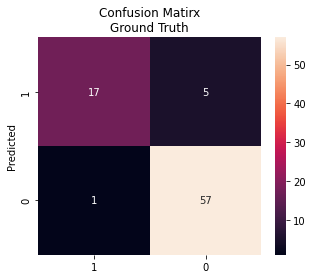

In [13]:
cm  = confusion_matrix(y_test, y_pred, labels=[1, 0])

print("confution matrix\n", cm)

plt.figure(figsize=(5,4))

ax = sns.heatmap(cm, annot=True, fmt='d', xticklabels=[1, 0], yticklabels=[1, 0])
ax.set_ylabel('Predicted')
ax.set_title('Confusion Matirx\nGround Truth')
None

## Visualization

roc_curve(y_true, y_score)  

fpr - false positive rates,  tpr - true positive rates

In [14]:
y_probas = lr_classifier.predict_proba(X_test)
y_scores = y_probas[:,1]

fpr, tpr, _ = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)

Text(0.5, 1.0, 'ROC Curve')

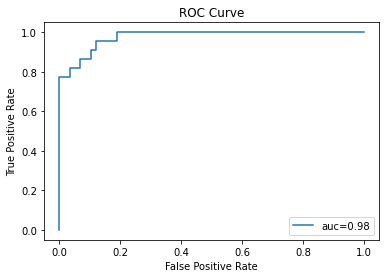

In [15]:
plt.plot(fpr, tpr, label="auc="+ "{:.2f}".format(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# 실습 

### 통신회사의 고객 이탈 여부를 logistic regression 으로 예측

In [16]:
churn_df = pd.read_csv("datasets/ChurnData.csv")

## Data pre-processing and feature selection

개별 feature 에 대한 분석 후(본 과정에서는 생략)에 Logistic Regression 에 사용할 feature 선정

tenure(가입기간), age (연령), income(수입) 으로 예측하고 churn (이탈여부) 은 integer 로 type 변경

In [17]:
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [18]:
churn_df = churn_df[['tenure', 'age', 'income', 'churn']]
churn_df['churn'] = churn_df['churn']
churn_df.head()

,tenure,age,income,churn
0,11.0,33.0,136.0,1.0
1,33.0,33.0,33.0,1.0
2,23.0,30.0,30.0,0.0
3,38.0,35.0,76.0,0.0
4,7.0,35.0,80.0,0.0


In [19]:
X = churn_df[['tenure', 'age', 'income']]
y = churn_df['churn']

### data scaling

In [20]:
# your code here

### Train/Test dataset 분리

In [21]:
# your code here

In [22]:
# train the model

In [23]:
# predict

In [24]:
# confusion matrix 작성

In [ ]:
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision: {:.2f}".format(precision_score(y_test, y_pred)))
print("Recall: {:.2f}".format(recall_score(y_test, y_pred)))